In [1]:
import pandas as pd

In [2]:
from tqdm.notebook import tqdm

In [3]:

df = pd.read_csv('D:\\uberr.csv', sep=',') 

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df = df.drop(df.index[-1])

In [7]:
#Function 
def convert_column_to_datetime(df, column_name):
    """
    Convert a column of date strings in a DataFrame to datetime objects.

    Args:
    - df (DataFrame): The input DataFrame.
    - column_name (str): The name of the column to convert.

    Returns:
    - DataFrame: The DataFrame with the converted datetime objects.
    """
    df[column_name] = pd.to_datetime(df[column_name])
    return df

df = convert_column_to_datetime(df, 'START_DATE*')
print(df['START_DATE*'])


0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 1155, dtype: datetime64[ns]


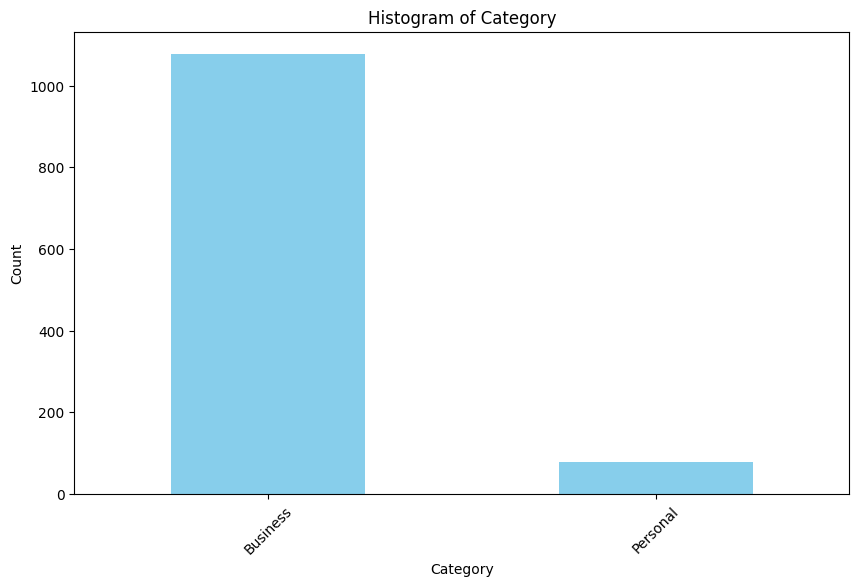

In [5]:

# Create a histogram for the 'CATEGORY*' column
plt.figure(figsize=(10, 6))
df['CATEGORY*'].value_counts().plot(kind='bar', color='skyblue')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category')
plt.xticks(rotation=45)

plt.show()

In [6]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

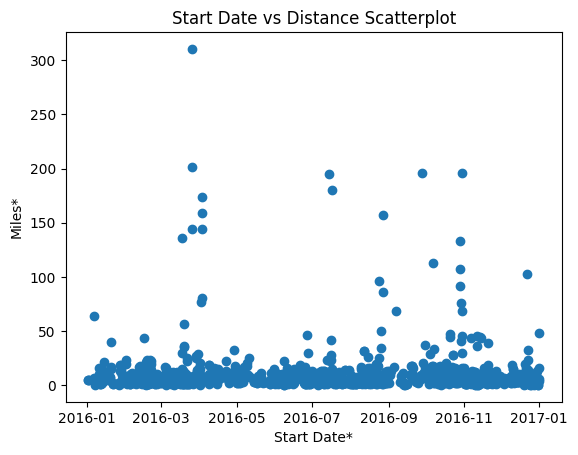

In [11]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce')
plt.scatter(df['START_DATE*'], df['MILES*'])
plt.xlabel('Start Date*')
plt.ylabel('Miles*')
plt.title('Start Date vs Distance Scatterplot')
plt.show()


In [21]:
#Describe for Miles column
df['MILES*'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

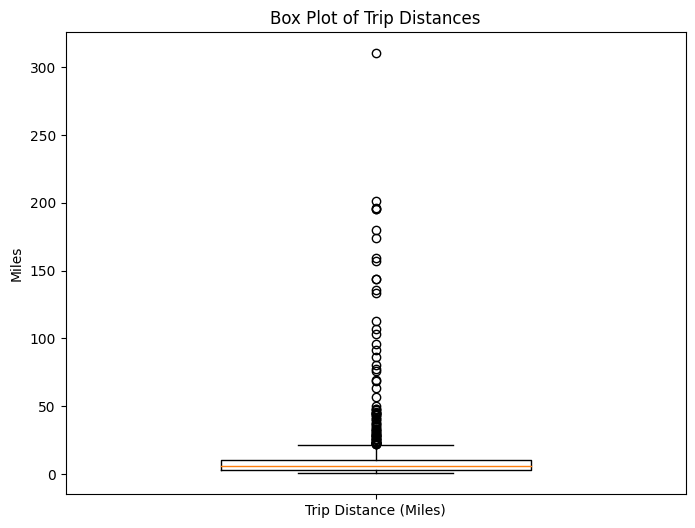

In [17]:
import matplotlib.pyplot as plt
df = df[:-1]
trip_distances = df['MILES*']
plt.figure(figsize=(8, 6))  # Set the figure size

# Custom bins for better visualization
bins = [0, 5, 10, 15, 20]

plt.boxplot(trip_distances, widths=0.5)  # Set the width of the boxes
plt.xticks([1], ['Trip Distance (Miles)'])
plt.title('Box Plot of Trip Distances')
plt.ylabel('Miles')
plt.show()